# Exploring Support Vector Machines

**NOTE: For this example, we will explore the algorithm, so we'll skip scaling and also skip a train\test split and instead see how the various parameters can change an SVM (easiest to visualize the effects in classification)**

[Link to a great Paper on SVM](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)
* A tutorial on support vector regression by ALEX J. SMOLA and BERNHARD SCHOLKOPF

## SVM - Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

In [2]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

## Classes

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

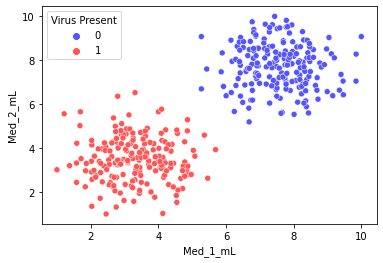

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

## Separating Hyperplane

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

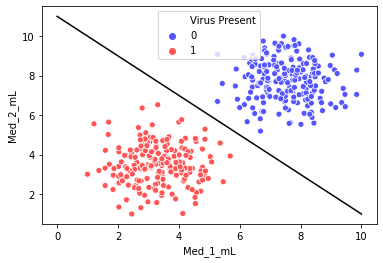

In [6]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

## SVM - Support Vector Machine

In [6]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [7]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [8]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [9]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

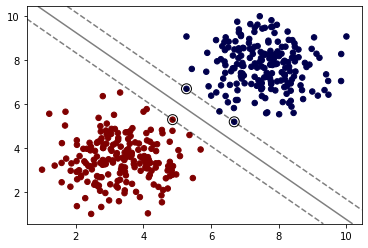

In [10]:
plot_svm_boundary(model,X,y)

In [19]:
model.class_weight_

array([1., 1.])

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [11]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

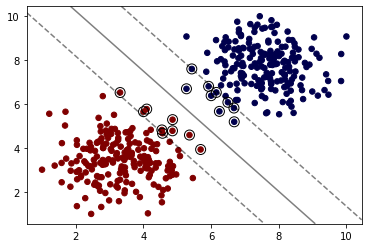

In [12]:
plot_svm_boundary(model,X,y)

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

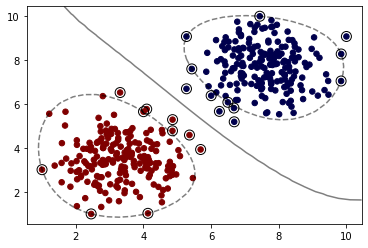

In [14]:
model = SVC(kernel='rbf', C=0.5)
model.fit(X, y)
plot_svm_boundary(model,X,y)

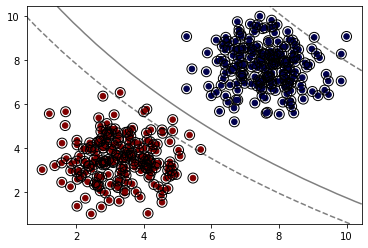

In [16]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

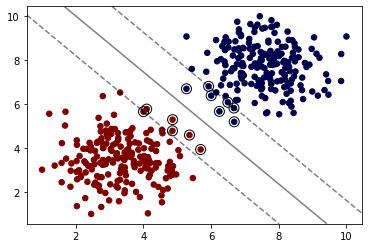

In [18]:
model = SVC(kernel='poly', degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

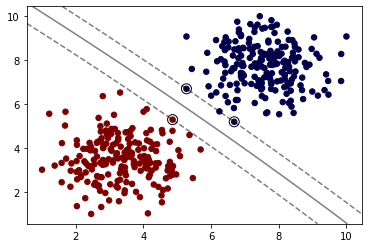

In [22]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [23]:
model.support_vectors_

array([[6.68307209, 5.19427732],
       [5.27060321, 6.6968394 ],
       [4.85999842, 5.29248262]])

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

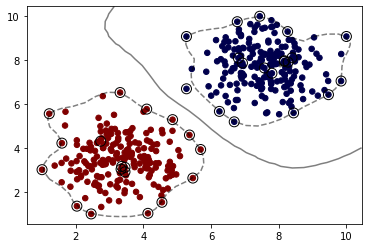

In [26]:
model = SVC(kernel='rbf', C=1,gamma='auto')
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [29]:
# Note again we didn't split Train|Test
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [30]:
# 100% accuracy (as expected)
grid.best_score_

1.0

In [31]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

This is more to review the grid search process, recall in a real situation such as your exercise, you will perform a train|test split and get final evaluation metrics.

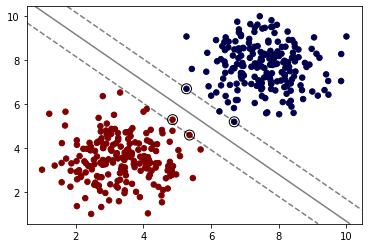

In [32]:
model = SVC(kernel='linear')
model.fit(X, y)
plot_svm_boundary(model,X,y)